In [12]:
import pandas as pd
import seaborn as sns
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt


In [13]:
boston_2015 = pd.read_csv(r'data/boston_results/marathon_results_2015.csv')
boston_2016 = pd.read_csv(r'data/boston_results/marathon_results_2016.csv')
boston_2017 = pd.read_csv(r'data/boston_results/marathon_results_2017.csv')

In [14]:
boston_2015.rename(columns={'40K':'fourty_split',
                            "35K": 'thirty_five_split',
                            '30K':'thirty_split',
                            "25K": 'twenty_five_split',
                            '20K':'twenty_split',
                            "15K": 'fifteen_split',
                            '10K':'ten_split',
                            "5K": 'five_split',
                            "M/F": 'Sex'}, inplace = True)
boston_2015 = boston_2015.drop(boston_2015[boston_2015.fourty_split == '-'].index)
boston_2015 = boston_2015.drop(boston_2015[boston_2015.thirty_five_split == '-'].index)
boston_2015 = boston_2015.drop(boston_2015[boston_2015.thirty_split == '-'].index)
boston_2015 = boston_2015.drop(boston_2015[boston_2015.twenty_five_split == '-'].index)
boston_2015 = boston_2015.drop(boston_2015[boston_2015.twenty_split == '-'].index)
boston_2015 = boston_2015.drop(boston_2015[boston_2015.fifteen_split == '-'].index)
boston_2015 = boston_2015.drop(boston_2015[boston_2015.ten_split == '-'].index)
boston_2015 = boston_2015.drop(boston_2015[boston_2015.five_split == '-'].index)
boston_2015 = boston_2015.drop(boston_2015[boston_2015.Half == '-'].index)

In [15]:
boston_2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26298 entries, 0 to 26597
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         26298 non-null  int64 
 1   Bib                26298 non-null  object
 2   Name               26298 non-null  object
 3   Age                26298 non-null  int64 
 4   Sex                26298 non-null  object
 5   City               26298 non-null  object
 6   State              23786 non-null  object
 7   Country            26298 non-null  object
 8   Citizen            1050 non-null   object
 9   Unnamed: 9         67 non-null     object
 10  five_split         26298 non-null  object
 11  ten_split          26298 non-null  object
 12  fifteen_split      26298 non-null  object
 13  twenty_split       26298 non-null  object
 14  Half               26298 non-null  object
 15  twenty_five_split  26298 non-null  object
 16  thirty_split       26298 non-null  objec

In [16]:
def get_seconds(time_str_series):
    # split in hh, mm, ss
    time_lst = []
    try:
        for i in time_str_series:
            hh, mm, ss = i.split(':')
            time_lst.append(int(hh) * 3600 + int(mm) * 60 + int(ss))
    except ValueError:
        return [i, 'is the broken one']
    return time_lst
    
boston_2015['Time in Seconds'] = get_seconds(boston_2015['Official Time'])
boston_2015['Half in Seconds'] = get_seconds(boston_2015['Half'])

In [17]:
display(boston_2015['Time in Seconds'])

0         7757
1         7788
2         7822
3         7847
4         7849
         ...  
26593    27536
26594    28290
26595    28773
26596    28837
26597    29161
Name: Time in Seconds, Length: 26298, dtype: int64

Columns used:
Age
M/F
Official time : Time it took to complete the marathon as a string
Time in Seconds : Official time converted to int


In [18]:
boston_2015['Official Time'][1]

'2:09:48'

In [19]:
age_scatter = sns.scatterplot(x='Age', y='Official Time', data= boston_2015.iloc[::50, :], hue='Sex')
plt.xticks(np.arange(2:09:48, len(boston_2015['Age'])+1, 50))



SyntaxError: invalid syntax (1275702303.py, line 2)

This shows plots age and gender over finishing time. As we can see Men are finishing faster, and people over 60 are finishing slower, this is sort of a given, but who is pacing the best? And at what age do we start to slow down?

In [41]:
age_groups = [[18,24],
                [25,29],
                [30,34],
                [35,39],
                [40,44],
                [45,49],
                [50,54],
                [55,59],
                [60,64],
                [65,69],
                [70,74],
                [75,79],
                [80,84],
                [85,89]]

def avg_per_age_group (df):
    avg_times = []
    for i in age_groups:
        avg = df.query(f'Age >= {i[0]} & Age <= {i[1]}')
        avg_times.append([str(i), avg['Time in Seconds'].mean()])
    return avg_times

age_group_avg = pd.DataFrame(avg_per_age_group(boston_2015), columns= ['Age Group', 'Average Time'])

age_group_avg

,Age Group,Average Time
0,"[18, 24]",13468.476226
1,"[25, 29]",13062.848734
2,"[30, 34]",13038.859127
3,"[35, 39]",13063.777965
4,"[40, 44]",13330.330121
5,"[45, 49]",13542.390124
6,"[50, 54]",13849.137024
7,"[55, 59]",14304.525024
8,"[60, 64]",15064.378028
9,"[65, 69]",15995.379381


<AxesSubplot:xlabel='Age Group', ylabel='Average Time'>

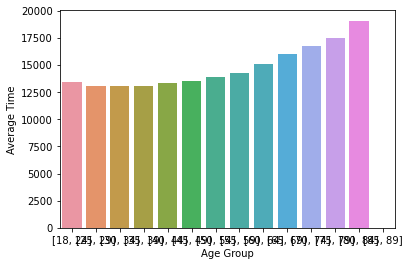

In [ ]:
sns.barplot(x='Age Group', y='Average Time',data=age_group_avg)

here we see the average times for all contenstants in 2015 grouped by 5 year age groups

In [ ]:
age = boston_2015['Time in Seconds'].mean()
age


13564.778766446118

,9,10,11,12,13,14,15,16,17,18,19
Age,27.000000,28.000000,29.000000,30.000000,31.000000,32.00000,33.000000,34.000000,35.000000,36.000000,37.000000
Average Time,12989.767442,12950.503378,13094.198748,13158.714527,12986.464226,12996.18942,13070.557078,12978.848639,12930.764151,13137.980636,13013.078167


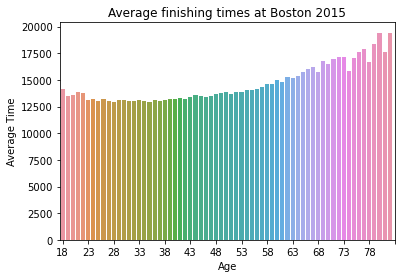

In [92]:
def avg_per_age(df):
    avg_times = []
    unique_ages = df.Age.unique()
    for i in np.sort(unique_ages):
        avg = df.query(f'Age == {i}')
        avg_times.append([i, avg['Time in Seconds'].mean()])
    return avg_times
all_ages_avg = pd.DataFrame(avg_per_age(boston_2015), columns=['Age', 'Average Time'])
sns.barplot(data=all_ages_avg, x="Age",y="Average Time")
plt.xticks(np.arange(0, len(all_ages_avg['Age'])+1, 5))
plt.title("Average finishing times at Boston 2015", fontsize=12)
all_ages_avg['Average Time'].min()
all_ages_avg[9:20].transpose()

Text(0.5, 1.0, 'Finishing times at Boston 2015')

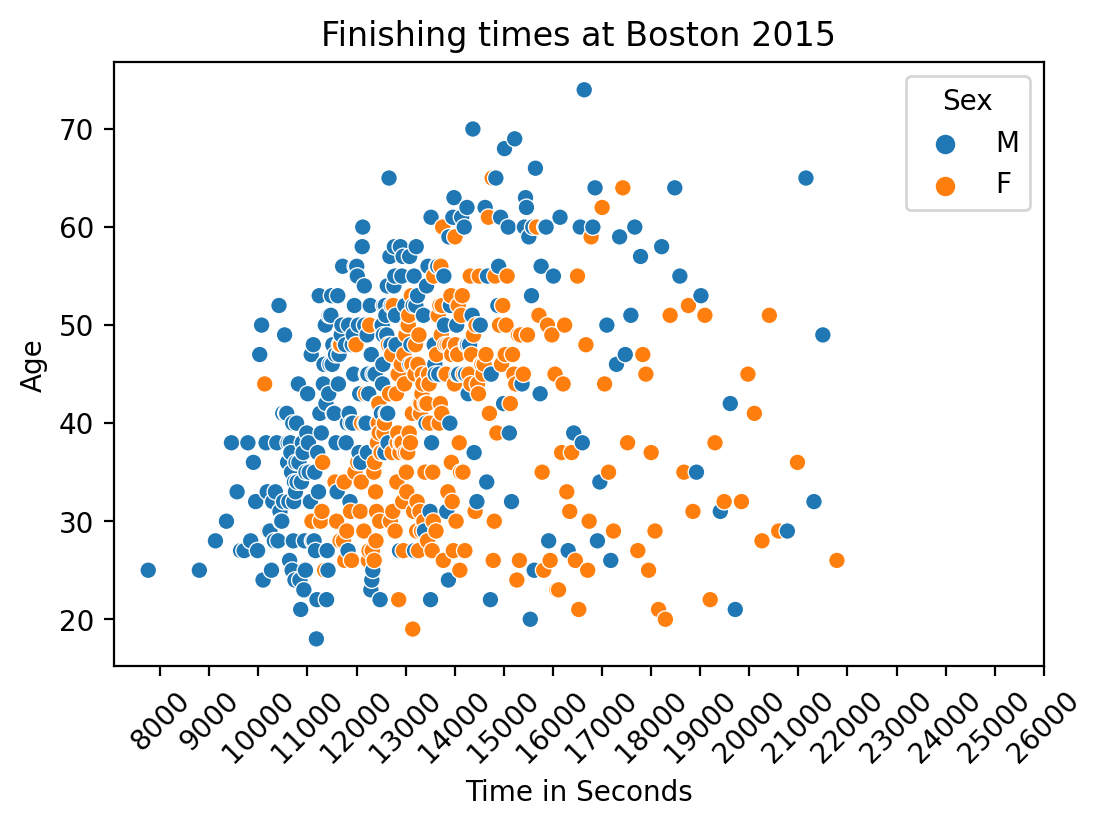

In [ ]:
age_scatter = sns.scatterplot(y='Age', x='Time in Seconds', data= boston_2015.iloc[::50, :], hue='Sex')

plt.xticks(np.arange(8000, len(boston_2015['Time in Seconds'])+1, 1000), rotation=45)
plt.title("Finishing times at Boston 2015", fontsize=12)


In [ ]:
boston_2015.query('Age == 18')['Time in Seconds'].mean() > boston_2015.query('Age == 57')['Time in Seconds'].mean()

False

Fastest age varies between generally hovers around 30, but the intresting thing is the average time for 18 year olds is slower than the average for 56 year olds, what other athletic event are 50 year olds competitive with 18 year olds?

In [ ]:
boston_2015['Time in Seconds']
boston_2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26298 entries, 0 to 26597
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         26298 non-null  int64 
 1   Bib                26298 non-null  object
 2   Name               26298 non-null  object
 3   Age                26298 non-null  int64 
 4   Sex                26298 non-null  object
 5   City               26298 non-null  object
 6   State              23786 non-null  object
 7   Country            26298 non-null  object
 8   Citizen            1050 non-null   object
 9   Unnamed: 9         67 non-null     object
 10  five_split         26298 non-null  object
 11  ten_split          26298 non-null  object
 12  fifteen_split      26298 non-null  object
 13  twenty_split       26298 non-null  object
 14  Half               26298 non-null  object
 15  twenty_five_split  26298 non-null  object
 16  thirty_split       26298 non-null  objec

In [ ]:
def make_pace_df(df):
    pace_df = pd.DataFrame([df["Age"], df['Sex'], df['Time in Seconds'], df['Overall'], df['Gender'], df['Division']]).transpose()
    pace_df['five_split_pace'] = np.array(get_seconds(df['five_split'])) / 5
    pace_df['ten_split_pace'] = (np.array(get_seconds(df['ten_split'])) - np.array(get_seconds(df['five_split'])))/ 5
    pace_df['fifteen_split_pace'] = (np.array(get_seconds(df['fifteen_split'])) - np.array(get_seconds(df['ten_split'])))/ 5
    pace_df['twenty_split_pace'] = (np.array(get_seconds(df['twenty_split'])) - np.array(get_seconds(df['fifteen_split'])))/ 5
    pace_df['twenty_five_split_pace'] = (np.array(get_seconds(df['twenty_five_split'])) - np.array(get_seconds(df['twenty_split'])))/ 5
    pace_df['thirty_pace'] = (np.array(get_seconds(df['thirty_split'])) - np.array(get_seconds(df['twenty_five_split'])))/ 5
    pace_df['thirty_five_pace'] = (np.array(get_seconds(df['thirty_five_split'])) - np.array(get_seconds(df['thirty_split'])))/ 5
    pace_df['fourty_pace'] = (np.array(get_seconds(df['fourty_split'])) - np.array(get_seconds(df['thirty_five_split'])))/ 5
    pace_df['final_two_pace'] = (pace_df['Time in Seconds'].to_numpy() - np.array(get_seconds(df['fourty_split'])))/2.195
    return pace_df
pace_df = make_pace_df(boston_2015)
pace_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26298 entries, 0 to 26597
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     26298 non-null  object 
 1   Sex                     26298 non-null  object 
 2   Time in Seconds         26298 non-null  object 
 3   Overall                 26298 non-null  object 
 4   Gender                  26298 non-null  object 
 5   Division                26298 non-null  object 
 6   five_split_pace         26298 non-null  float64
 7   ten_split_pace          26298 non-null  float64
 8   fifteen_split_pace      26298 non-null  float64
 9   twenty_split_pace       26298 non-null  float64
 10  twenty_five_split_pace  26298 non-null  float64
 11  thirty_pace             26298 non-null  float64
 12  thirty_five_pace        26298 non-null  float64
 13  fourty_pace             26298 non-null  float64
 14  final_two_pace          26298 non-null

In [ ]:
pace_df.iloc[:,6:14].transpose()

,0,1,2,3,4,5,6,7,8,9,...,26588,26589,26590,26591,26592,26593,26594,26595,26596,26597
five_split_pace,176.6,176.6,176.6,176.6,176.6,176.8,177.0,176.8,176.6,182.8,...,520.4,473.2,498.4,478.4,455.6,603.0,583.2,636.6,588.8,482.8
ten_split_pace,180.0,180.0,180.0,180.2,180.2,180.2,180.0,180.0,180.0,184.0,...,531.6,461.8,515.8,524.4,532.0,639.2,612.6,650.6,613.6,576.8
fifteen_split_pace,182.8,183.0,182.8,183.4,182.8,182.8,187.0,183.0,183.0,186.2,...,551.2,456.2,534.0,539.0,572.8,640.4,714.8,653.8,639.8,701.6
twenty_split_pace,186.4,186.0,186.4,185.6,186.0,186.0,184.6,186.2,186.0,187.6,...,580.4,572.8,559.8,562.4,623.2,666.6,681.0,664.4,698.0,743.0
twenty_five_split_pace,187.6,187.8,187.6,187.6,187.8,187.6,184.4,187.4,187.8,187.0,...,565.8,543.4,585.8,593.0,650.2,641.4,681.2,680.8,691.8,809.0
thirty_pace,190.6,190.4,190.6,190.6,190.6,190.6,190.8,190.4,190.6,190.6,...,633.2,745.4,661.8,647.0,680.6,646.2,710.8,781.0,742.2,811.6
thirty_five_pace,191.8,192.0,191.8,192.6,191.8,191.8,193.4,192.0,192.0,198.4,...,628.4,661.2,661.0,653.6,671.4,691.0,683.6,719.0,748.8,813.4
fourty_pace,176.0,176.6,180.4,188.8,185.6,183.8,191.8,203.8,199.8,198.6,...,585.0,678.6,688.6,727.2,620.2,675.0,688.6,689.4,744.6,599.4


<ipython-input-106-5a6658159ca6>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['5k','10k','15k','20k','25k','30k','35k','40k','42.2'])


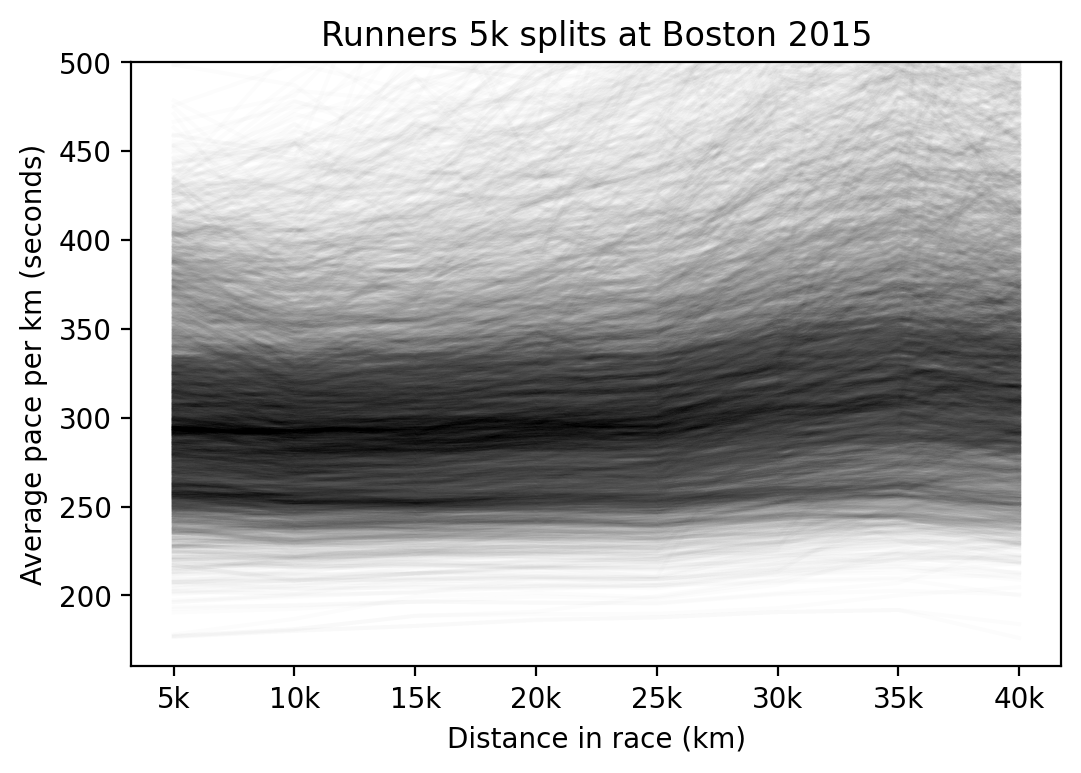

In [ ]:
plt.rcParams['figure.dpi'] = 200
ax = sns.lineplot(data= pace_df.iloc[0::5,6:14].transpose(), alpha = 0.01, legend=None, dashes= False, 
palette=['black']* (len(pace_df.index)//5+1))
ax.set(ylim=(160,500))
plt.xlabel("Distance in race (km)", fontsize=10)
plt.ylabel("Average pace per km (seconds)", fontsize=10)
plt.title("Runners 5k splits at Boston 2015", fontsize=12)
ax.set_xticklabels(['5k','10k','15k','20k','25k','30k','35k','40k','42.2'])
plt.show()

- 3:00 hour pace = 259 seconds
- 3:30 pace = 298 seconds
- 4:00 pace = 341 seconds

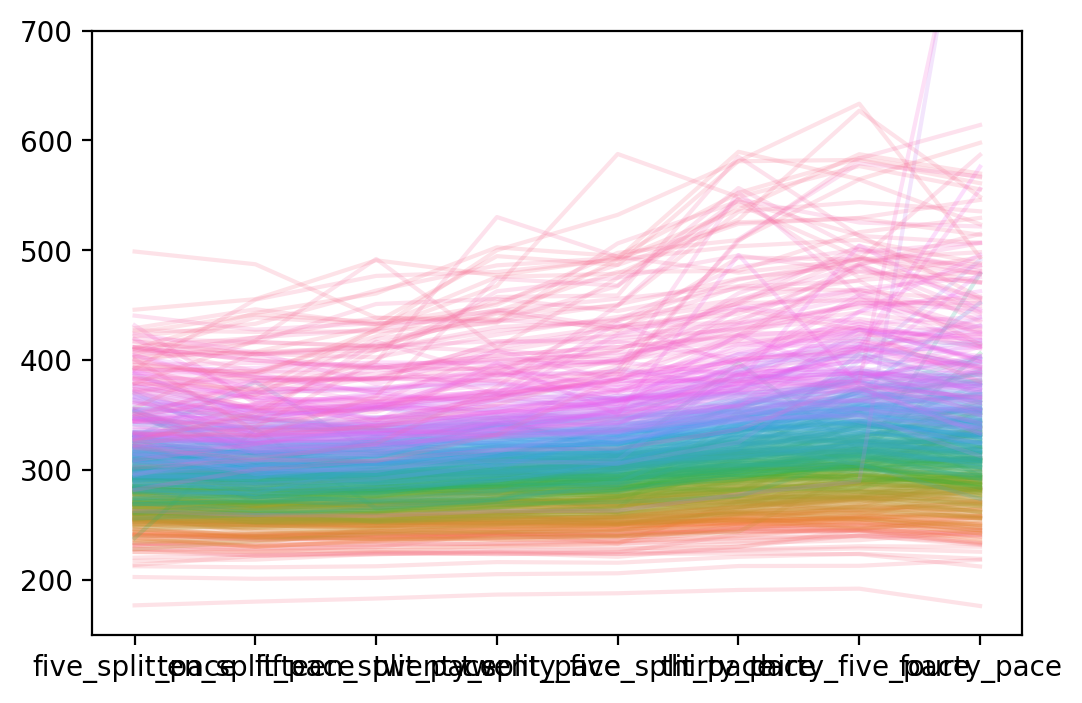

In [ ]:
plt.rcParams['figure.dpi'] = 200
ax = sns.lineplot(data= pace_df.iloc[0::50,6:14].transpose(), alpha = 0.2, legend=None, dashes= False)
ax.set(ylim=(150,700))
plt.show()

In [ ]:
boston_2015

,Unnamed: 0,Bib,Name,Age,Sex,City,State,Country,Citizen,Unnamed: 9,...,thirty_five_split,fourty_split,Pace,Proj Time,Official Time,Overall,Gender,Division,Time in Seconds,Half in Seconds
0,0,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,NaN,...,1:47:59,2:02:39,0:04:56,-,2:09:17,1,1,1,7757,3842
1,1,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,NaN,...,1:47:59,2:02:42,0:04:58,-,2:09:48,2,2,2,7788,3841
2,2,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,NaN,NaN,...,1:47:59,2:03:01,0:04:59,-,2:10:22,3,3,3,7822,3842
3,3,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,NaN,NaN,...,1:48:03,2:03:47,0:05:00,-,2:10:47,4,4,4,7847,3842
4,4,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,NaN,NaN,...,1:47:59,2:03:27,0:05:00,-,2:10:49,5,5,5,7849,3841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26593,26593,25656,"Prescott, Francine J.",64,F,Boynton Beach,FL,USA,NaN,MI,...,6:17:19,7:13:34,0:17:31,-,7:38:56,26594,12015,269,27536,13426
26594,26594,31359,"Emerson, Annette C.",61,F,Old Town,ME,USA,NaN,NaN,...,6:28:56,7:26:19,0:17:59,-,7:51:30,26595,12016,270,28290,13675
26595,26595,25559,"Cerveny, Nona",66,F,Scottsdale,AZ,USA,NaN,NaN,...,6:38:51,7:36:18,0:18:18,-,7:59:33,26596,12017,91,28773,13701
26596,26596,29396,"Buccilli, Alfred P.",53,M,Lynnfield,MA,USA,NaN,NaN,...,6:33:35,7:35:38,0:18:20,-,8:00:37,26597,14580,2055,28837,13415


In [21]:
boston_2015_females = boston_2015[boston_2015.Sex == 'F']
boston_2015_males = boston_2015[boston_2015.Sex == 'M']
top_10_in_groups = boston_2015.query('Gender <= 1')
boston_2015['first/second_half_split'] = boston_2015['Time in Seconds'] - (boston_2015['Half in Seconds']*2) 
boston_2015['first/second_half_split'].mean()

619.8856947296372

Text(0.5, 1.0, 'Split times at Boston 2015')

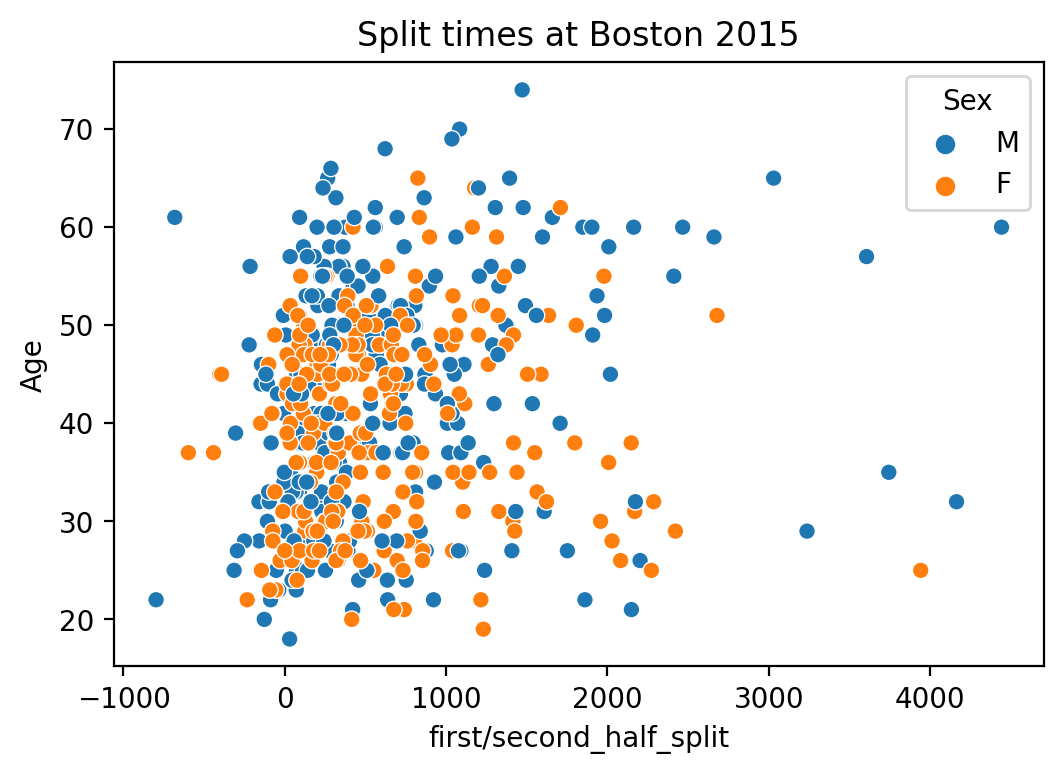

In [ ]:
sns.scatterplot(x='first/second_half_split',y='Age',data=boston_2015.iloc[::50, :], hue='Sex')
plt.title("Split times at Boston 2015", fontsize=12)


Text(0.5, 1.0, 'Average split times at Boston 2015')

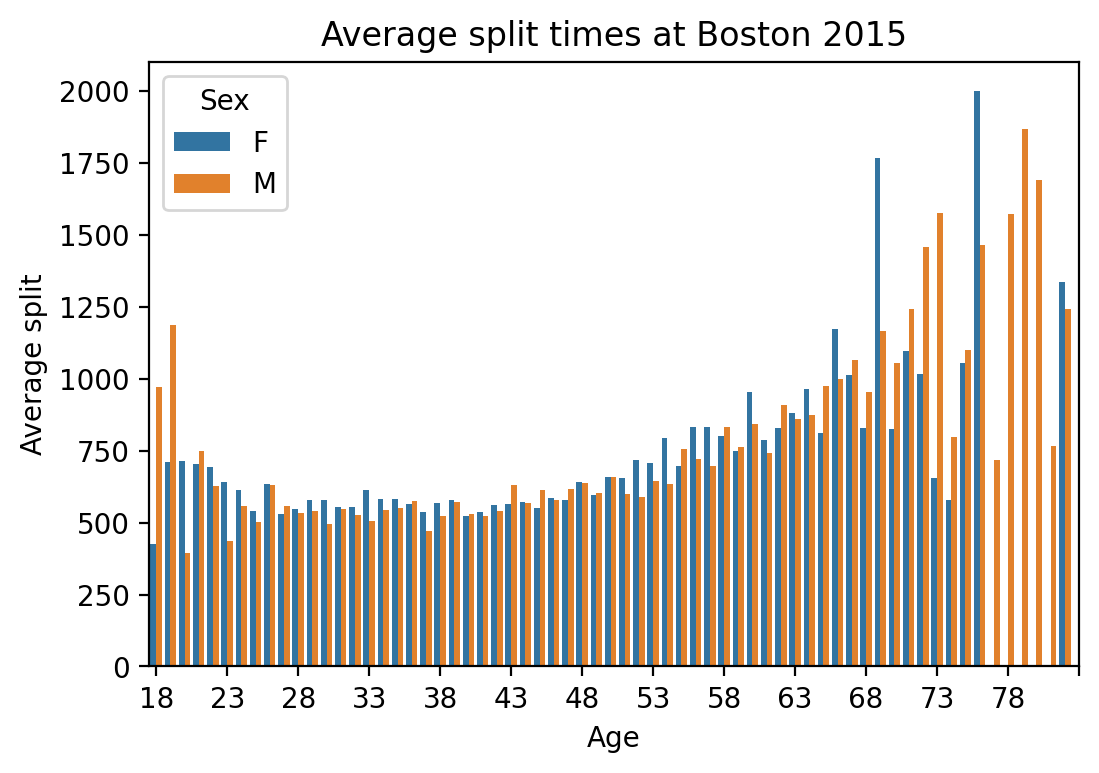

In [ ]:
def avg_split_age(df):
    avg_times = []
    unique_ages = df.Age.unique()
    male = df.query('Sex == "M"')
    female = df.query('Sex == "F"')
    for i in np.sort(unique_ages):
        avg_male = male.query(f'Age == {i}')
        avg_female = female.query(f'Age == {i}')
        avg_times.append(['F',i, avg_female['first/second_half_split'].mean()])
        avg_times.append(['M',i, avg_male['first/second_half_split'].mean()])
    return avg_times
age_group_avg = pd.DataFrame(avg_split_age(boston_2015), columns= ['Sex','Age', 'Average split'])
sns.barplot(data= age_group_avg, x='Age', y='Average split', hue='Sex')
plt.xticks(np.arange(0, len(all_ages_avg['Age'])+1, 5))
plt.title("Average split times at Boston 2015", fontsize=12)

In [ ]:
boston_2015.query('Age == 18')

,Unnamed: 0,Bib,Name,Age,Sex,City,State,Country,Citizen,Unnamed: 9,...,fourty_split,Pace,Proj Time,Official Time,Overall,Gender,Division,Time in Seconds,Half in Seconds,first/second_half_split
1011,1011,1903,"Ellwanger, Chatham",18,M,Hickory,NC,USA,NaN,NaN,...,2:41:13,0:06:31,-,2:50:42,1012,971,817,10242,4900,442
1540,1540,5440,"Negi, Abhay",18,M,San Francisco,CA,USA,NaN,NaN,...,2:45:04,0:06:41,-,2:54:53,1541,1463,1174,10493,5160,173
3857,3857,30062,"Chhokra, Shubhankar",18,M,Cambridge,MA,USA,NaN,NaN,...,2:56:23,0:07:07,-,3:06:22,3858,3580,2473,11182,5576,30
3885,3885,6992,"Altomari, Collin P.",18,M,Severna Park,MD,USA,NaN,NaN,...,2:56:18,0:07:07,-,3:06:30,3886,3607,2485,11190,5401,388
6368,6368,27650,"Smith, Ezekiel S.",18,M,Gill,MA,USA,NaN,NaN,...,3:05:53,0:07:33,-,3:17:32,6369,5518,3141,11852,5627,598
10282,10282,10616,"Brady, Alison",18,F,Las Vegas,NV,USA,NaN,NaN,...,3:18:37,0:08:02,-,3:30:26,10283,2479,1966,12626,5963,700
10396,10396,15518,"Reid, Elizabeth D.",18,F,Barry's Bay,ON,CAN,USA,NaN,...,3:19:28,0:08:03,-,3:30:46,10397,2526,1997,12646,6081,484
12345,12345,13378,"Price, Nikita C.",18,F,West Point,NY,USA,NaN,NaN,...,3:24:56,0:08:17,-,3:36:45,12346,3654,2723,13005,6562,-119
15069,15069,27904,"Ingham, Curtis A.",18,M,Natick,MA,USA,NaN,NaN,...,3:33:51,0:08:36,-,3:45:27,15070,9813,3860,13527,6513,501
18149,18149,28662,"Lanagan, Olivia R.",18,F,Hanover,MA,USA,NaN,NaN,...,3:44:11,0:09:02,-,3:56:39,18150,7165,4109,14199,6863,473


In [24]:
import pingouin as pg
pg.ancova(data=boston_2015, dv='Age', covar='first/second_half_split', between='Sex')

,Source,SS,DF,F,p-unc,np2
0,Sex,1.519486e+05,1,1269.120759,1.652025e-271,0.046042
1,first/second_half_split,4.574742e+04,1,382.096349,1.732770e-84,0.014323
2,Residual,3.148233e+06,26295,NaN,NaN,NaN


/Users/eli_ahlander/opt/anaconda3/envs/CapstoneEnv/lib/python3.7/site-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


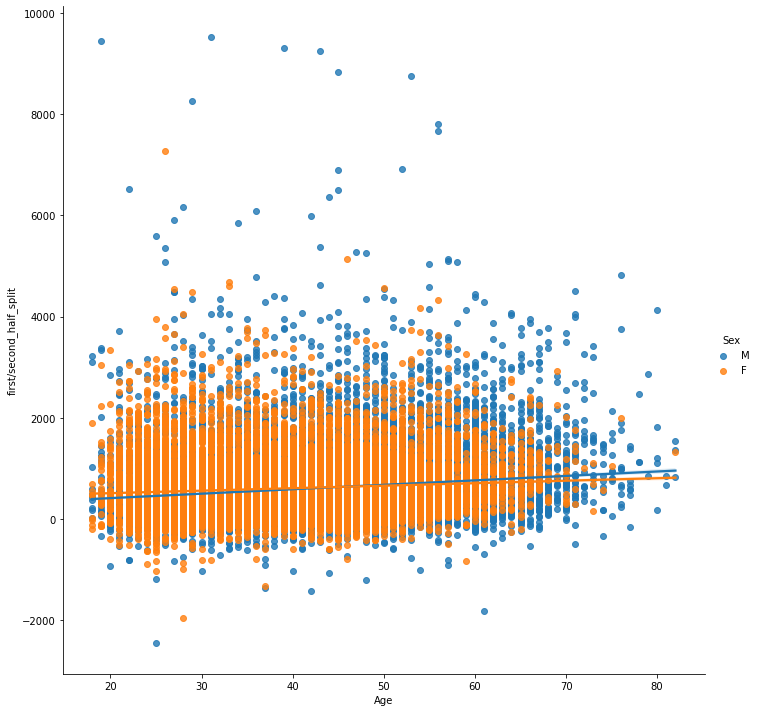

In [63]:
sns.lmplot(x='Age', y='first/second_half_split', hue='Sex', data=boston_2015, size=10)  


/Users/eli_ahlander/opt/anaconda3/envs/CapstoneEnv/lib/python3.7/site-packages/seaborn/categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


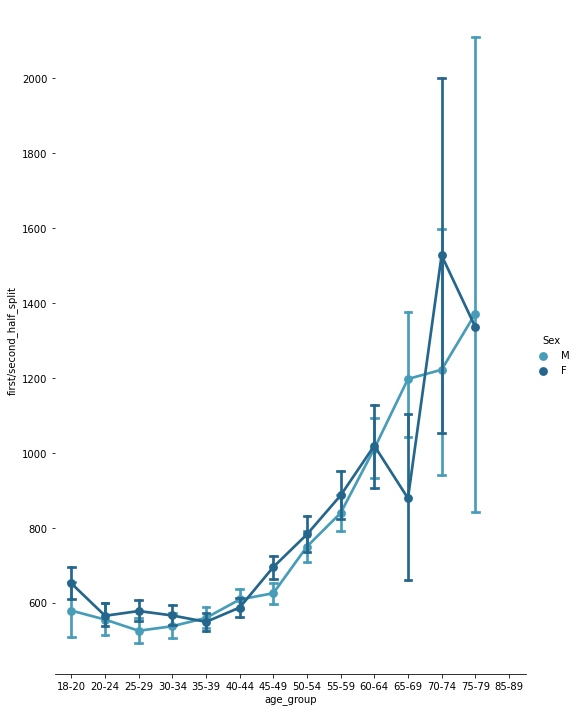

In [65]:
g = sns.catplot(y="first/second_half_split", x="age_group", hue="Sex",
                capsize=.2, palette="YlGnBu_d", height=6, aspect=.75,
                kind="point", data=boston_2015, size=10)
g.despine(left=True)

In [64]:
def get_num_people_by_age_category(df):
    df["age_group"] = pd.cut(x=df['Age'], bins=[20,24,29,34,39,44,49,54,59,64,69,74,79,84,89], labels=["18-20","20-24","25-29","30-34","35-39","40-44","45-49","50-54","55-59","60-64","65-69","70-74","75-79","85-89"])
    return df
get_num_people_by_age_category(boston_2015)

,Unnamed: 0,Bib,Name,Age,Sex,City,State,Country,Citizen,Unnamed: 9,five_split,ten_split,fifteen_split,twenty_split,Half,twenty_five_split,thirty_split,thirty_five_split,fourty_split,Pace,Proj Time,Official Time,Overall,Gender,Division,Time in Seconds,Half in Seconds,first/second_half_split,age_group
0,0,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,NaN,0:14:43,0:29:43,0:44:57,1:00:29,1:04:02,1:16:07,1:32:00,1:47:59,2:02:39,0:04:56,-,2:09:17,1,1,1,7757,3842,73,20-24
1,1,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,NaN,0:14:43,0:29:43,0:44:58,1:00:28,1:04:01,1:16:07,1:31:59,1:47:59,2:02:42,0:04:58,-,2:09:48,2,2,2,7788,3841,106,25-29
2,2,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,NaN,NaN,0:14:43,0:29:43,0:44:57,1:00:29,1:04:02,1:16:07,1:32:00,1:47:59,2:03:01,0:04:59,-,2:10:22,3,3,3,7822,3842,138,20-24
3,3,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,NaN,NaN,0:14:43,0:29:44,0:45:01,1:00:29,1:04:02,1:16:07,1:32:00,1:48:03,2:03:47,0:05:00,-,2:10:47,4,4,4,7847,3842,163,20-24
4,4,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,NaN,NaN,0:14:43,0:29:44,0:44:58,1:00:28,1:04:01,1:16:07,1:32:00,1:47:59,2:03:27,0:05:00,-,2:10:49,5,5,5,7849,3841,167,25-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26593,26593,25656,"Prescott, Francine J.",64,F,Boynton Beach,FL,USA,NaN,MI,0:50:15,1:43:31,2:36:53,3:32:26,3:43:46,4:25:53,5:19:44,6:17:19,7:13:34,0:17:31,-,7:38:56,26594,12015,269,27536,13426,684,55-59
26594,26594,31359,"Emerson, Annette C.",61,F,Old Town,ME,USA,NaN,NaN,0:48:36,1:39:39,2:39:13,3:35:58,3:47:55,4:32:44,5:31:58,6:28:56,7:26:19,0:17:59,-,7:51:30,26595,12016,270,28290,13675,940,55-59
26595,26595,25559,"Cerveny, Nona",66,F,Scottsdale,AZ,USA,NaN,NaN,0:53:03,1:47:16,2:41:45,3:37:07,3:48:21,4:33:51,5:38:56,6:38:51,7:36:18,0:18:18,-,7:59:33,26596,12017,91,28773,13701,1371,60-64
26596,26596,29396,"Buccilli, Alfred P.",53,M,Lynnfield,MA,USA,NaN,NaN,0:49:04,1:40:12,2:33:31,3:31:41,3:43:35,4:29:20,5:31:11,6:33:35,7:35:38,0:18:20,-,8:00:37,26597,14580,2055,28837,13415,2007,45-49


/Users/eli_ahlander/opt/anaconda3/envs/CapstoneEnv/lib/python3.7/site-packages/seaborn/categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


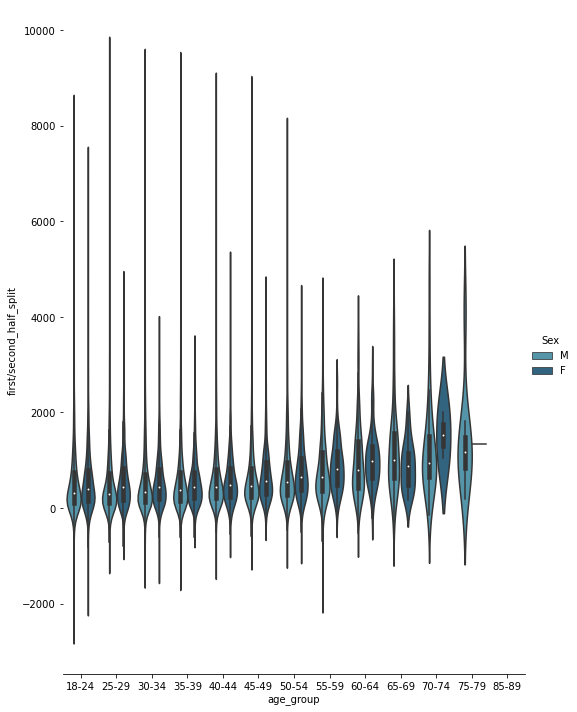

In [60]:
g = sns.catplot(y="first/second_half_split", x="age_group", hue="Sex",
                 palette="YlGnBu_d", height=6, aspect=.75,
                kind="violin", data=boston_2015, size=10)
g.despine(left=True)

In [84]:
import plotly.express as px
finishing_times_scatter = px.scatter(boston_2015.iloc[::25], x='Time in Seconds', y='Age', color='Sex', trendline='ols',hover_data=["Name", "Country"], title='Finishing Times at Boston 2015',labels={
    'Time in Seconds': 'Finishing Time'
})
finishing_times_scatter.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [7200, 9000, 10800, 12600, 14400, 16200,18000,19800,21600],
        ticktext = ['2:00', '2:30', '3:00', '3:30', '4:00', '4:30', '5:00','5:30', '6:00']
    )
)


In [85]:
boston_2015.to_csv('master_boston_2015')

In [108]:
avg_by_age_bar = px.bar(all_ages_avg, x='Age', y='Average Time', color='Average Time', title='Average finishing times at Boston 2015')
avg_by_age_bar.update_layout(
    yaxis = dict(
        tickmode = 'array',
        tickvals = [0,1800, 3600, 5400, 7200, 9000, 10800, 12600, 14400, 16200,18000,19800,21600],
        ticktext = ['0:00', '0:30','1:00', '1:30','2:00', '2:30', '3:00', '3:30', '4:00', '4:30', '5:00','5:30', '6:00']
    )
)
avg_by_age_bar.update_yaxes(rangemode='normal')
avg_by_age_bar.show()
